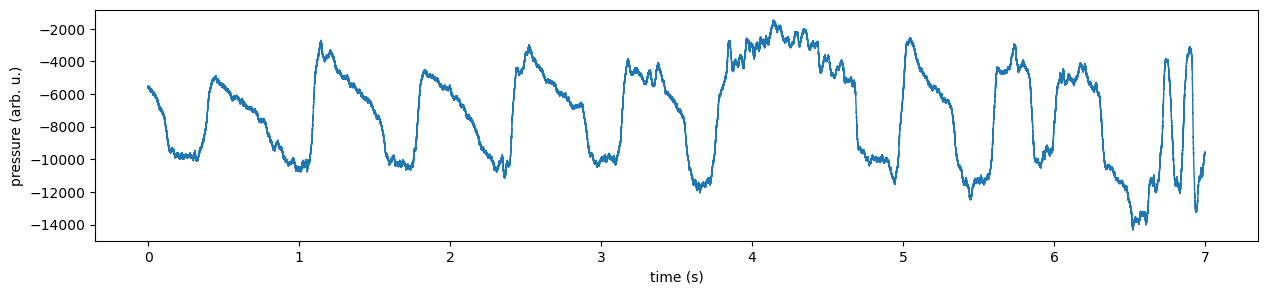

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile

file_path = 'C:/Users/facuf/Desktop/Facu 2023/Experimentos 2023/CaFF909-NaRo/Cantos/2023-10-19-day/pressure_CaFF909-NaRo_2023_10_19-08.34.28.wav'
fs, p_wav = wavfile.read(file_path)

p_wav = -1 * p_wav # esta medicion estaba invertida, esto quizas no lo necesitas

time = np.arange(0, len(p_wav)/fs, 1/fs)

#recorto para que sea solo respiracion y sea mas facil de ver
p_wav = p_wav[int(23*fs):]
time = time[int(23*fs):]
time -= time[0]

plt.figure(figsize=(15,3))
plt.plot(time, p_wav, lw=1)
plt.xlabel("time (s)")
plt.ylabel("pressure (arb. u.)")
plt.show()

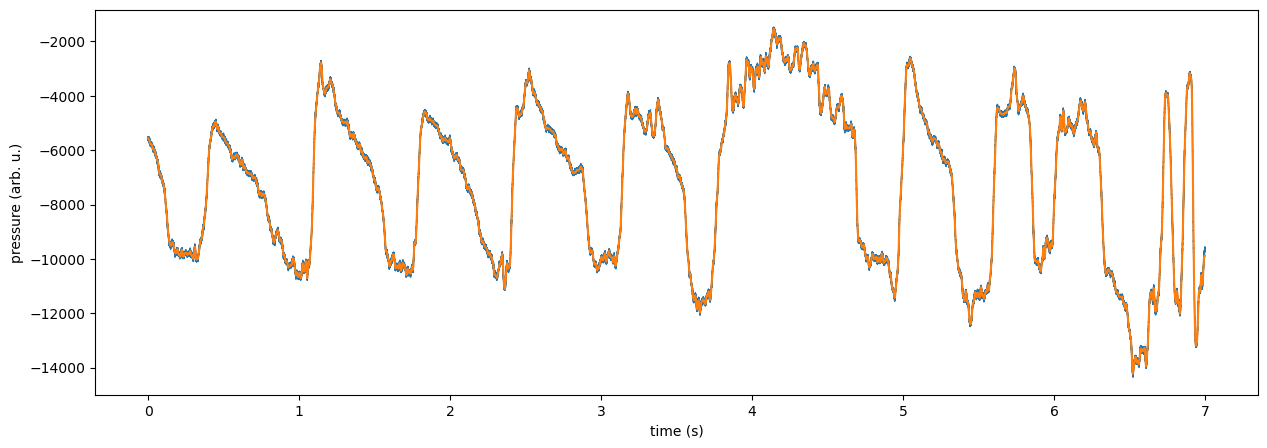

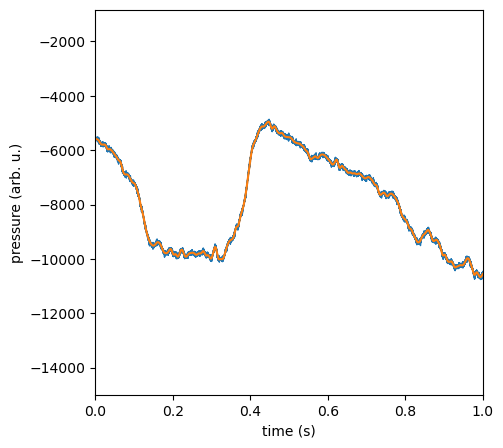

In [3]:
#1: filtrando con un butterworth pasado dos veces para no tener phase shift
order = 5
cutoff = 100  #Jugar con esto (frecuencia de corte)
b, a = signal.butter(order, cutoff, fs=44150)
p_filt = signal.filtfilt(b, a, p_wav)


plt.figure(figsize=(15,5))
plt.plot(time, p_wav, lw=1)
plt.plot(time, p_filt)
plt.xlabel("time (s)")
plt.ylabel("pressure (arb. u.)")
plt.show()


plt.figure(figsize=(5,5))
plt.plot(time, p_wav, lw=1)
plt.plot(time, p_filt)
plt.xlabel("time (s)")
plt.ylabel("pressure (arb. u.)")
plt.xlim([0,1])
plt.show()

Text(0.5, 0, 'Time (s)')

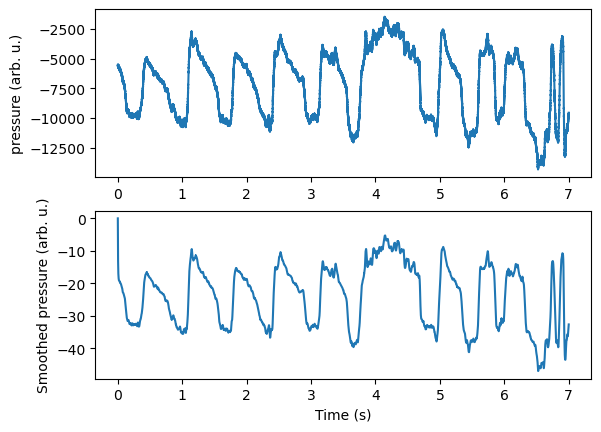

In [5]:
# La forma de gabo
#integrador
def rk4(dxdt, x, t, dt, *args, **kwargs):
    x = np.asarray(x)
    k1 = np.asarray(dxdt(x, t, *args, **kwargs))*dt
    k2 = np.asarray(dxdt(x + k1*0.5, t, *args, **kwargs))*dt
    k3 = np.asarray(dxdt(x + k2*0.5, t, *args, **kwargs))*dt
    k4 = np.asarray(dxdt(x + k3, t, *args, **kwargs))*dt
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

def f_suav(x, t, pars):
    l, value = pars[0], pars[1]
    dxdt = - l * x + value
    return dxdt


p_suav = np.zeros_like(time)
dt = np.mean(np.diff(time))

#esto regula cuanto suaviza
l = 300

for ix, tt in enumerate(time[:-1]):
    p_suav[ix+1] = rk4(f_suav, [p_suav[ix]], tt, dt, [l, p_wav[ix]])  #<- aca vamos poniendo que copie a la presion

plt.subplot(211)
plt.plot(time, p_wav)
plt.ylabel("pressure (arb. u.)")
plt.subplot(212)
plt.plot(time, p_suav)
plt.ylabel("Smoothed pressure (arb. u.)")
plt.xlabel("Time (s)")

In [ ]:
# Si uno lo hace con un seguidor mas lento:
p_suav = np.zeros_like(time)
dt = np.mean(np.diff(time))

#esto regula cuanto suaviza
l = 50

for ix, tt in enumerate(time[:-1]):
    p_suav[ix+1] = rk4(f_suav, [p_suav[ix]], tt, dt, [l, p_wav[ix]])  #<- aca vamos poniendo que copie a la presion

plt.subplot(211)
plt.plot(time, p_wav)
plt.ylabel("pressure (arb. u.)")
plt.subplot(212)
plt.plot(time, p_suav)
plt.ylabel("Smoothed pressure (arb. u.)")
plt.xlabel("Time (s)")